In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


###just making a model for learning purpose###

In [16]:
# Create a Sequential model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True, input_shape=(4, 3)))

# Add a Dropout layer with a dropout rate of 0.2
model.add(Dropout(0.2))

# Add a Dense layer with 1 unit (output layer)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 4, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4, 1)           │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Transformers Library (transformers):

1) Provides pre-trained models for NLP tasks (BERT, GPT, T5, etc.)
Allows loading and fine-tuning models for tasks like text classification, summarization, and translation.
Dependencies Installed Along with transformers:

2) torch (if not installed) → Required for PyTorch models
tensorflow (if not installed) → Required for TensorFlow models
numpy → For tensor operations
tokenizers → Fast tokenization for NLP
requests → For downloading models from Hugging Face Hub

In [17]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [21]:
# 1. Data Acquisition
ticker = "AAPL"  # Example: Apple stock
start_date = "2015-01-01"
end_date = "2023-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [22]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635284,24.169164,23.448427,24.089082,257142000
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
2015-01-08,24.889900,24.947738,24.180285,24.298185,237458000


In [31]:
# 2. Data Preprocessing
# We'll use the 'Close' price as our target variable
close_prices = data['Close'].values  #.reshape(-1, 1)

In [30]:
print(close_prices.shape)

(2264, 1)


In [33]:
# Scale the data (important for neural networks)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

In [34]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use the past 60 days to predict the next day
X, y = create_sequences(scaled_prices, seq_length)

In [42]:

X.shape

(2204, 60, 1)

In [43]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# 3. Model Selection (LSTM)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict a single value (the next day's price)

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.layers

[<LSTM name=lstm_4, built=True>,
 <Dropout name=dropout_4, built=True>,
 <LSTM name=lstm_5, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_4, built=True>]

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0353
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0030
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0028
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0026
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0027
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0020
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0022
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0029
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0023
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0016
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0016
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0019
Epoc

In [53]:
# 5. Model Evaluation
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9652e-04
Mean Squared Error on Test Data: 0.000318431353662163


In [54]:
# 6. Make Predictions
predicted_prices = model.predict(X_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [57]:
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform to get actual prices


In [61]:
y_test = scaler.inverse_transform(y_test)

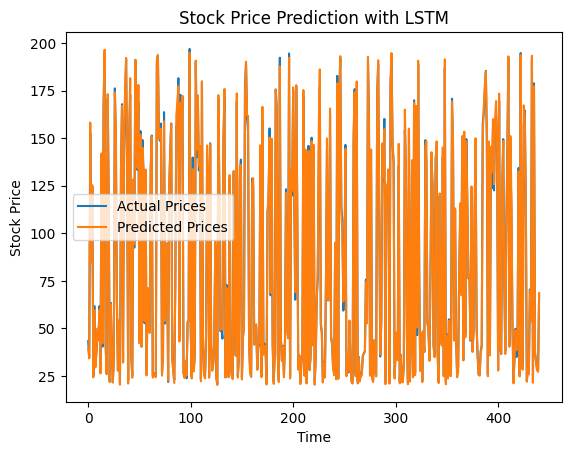

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot Results
plt.plot(y_test, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with LSTM")
plt.legend()
plt.show()


*** IMPORTANT CAVEATS ***
1. This is a SIMPLIFIED model for educational purposes only.
2. Stock market prediction is extremely difficult and inherently uncertain.
3. This model does NOT guarantee profits and should NOT be used for real trading.
4. Consider transaction costs, taxes, and other real-world factors.
5. Future data may not resemble past data, which can significantly impact model accuracy.

*** Possible Improvements ***
- Add more features: Technical indicators (RSI, MACD), sentiment analysis, news data, volume
- Optimize hyperparameters: Tune the number of layers, units, dropout rate, sequence length, learning rate
- Try different models:  Other time series models (ARIMA, Prophet), more complex neural networks
- Use a rolling window for training:  Retrain the model periodically with new data.